Al respecto de transformada de laplace

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

### Transformada de fourier continua

$$\frac{1}{2\pi} \int_{-\infty}^{\infty}f(t)e^{-iwt}dt$$

### En un contexto discreto y bidimensional

$$F(k, l) = \sum_{i=0}^{N-1}\sum_{i=0}^{N-1}f(i.j)e^{-i2\pi(\frac{k_i}{N} + \frac{l_j}{N})}$$

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [128]:
img = cv2.imread('lena_s.png', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

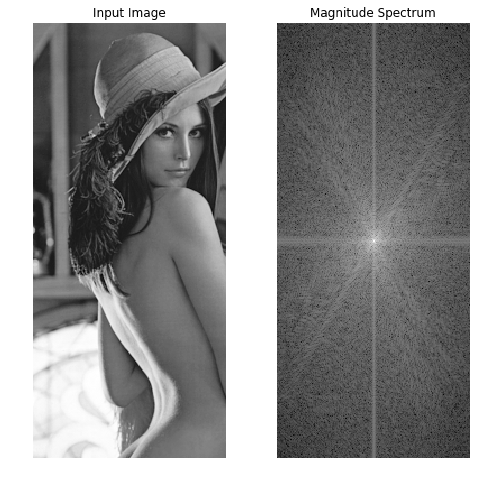

In [129]:
plt.figure(figsize=(8, 8))
plt.subplot(121); plt.imshow(img, cmap=plt.cm.gray)
plt.title("Input Image"); plt.axis('off')
plt.subplot(122); plt.imshow(magnitude_spectrum, cmap=plt.cm.gray)
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show()

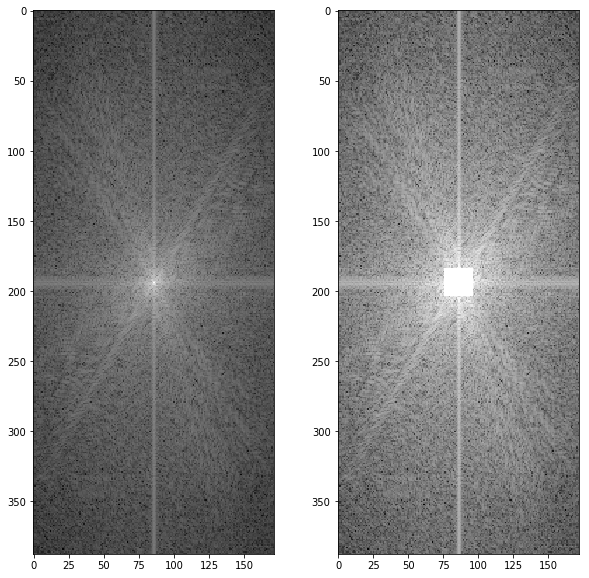

In [130]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow - 10: crow + 10, ccol - 10: ccol + 10] = 0
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(magnitude_spectrum, cmap=plt.cm.gray)
magnitude_spectrum2 = 20 * np.log(np.abs(fshift))
plt.subplot(122); plt.imshow(magnitude_spectrum2, cmap=plt.cm.gray)
plt.show()

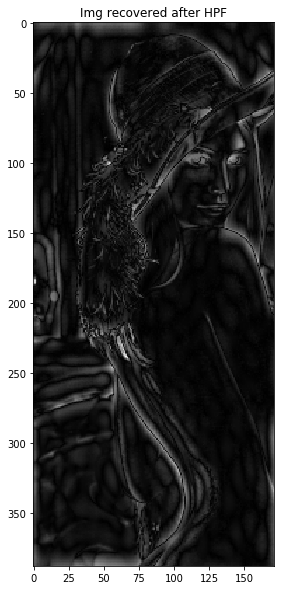

In [131]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back_h = np.abs(img_back)
plt.figure(figsize=(10,10))
plt.imshow(img_back_h, cmap=plt.cm.gray)
plt.title("Img recovered after HPF")
plt.show()

In [132]:
img = cv2.imread('lena_s.png', 0)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

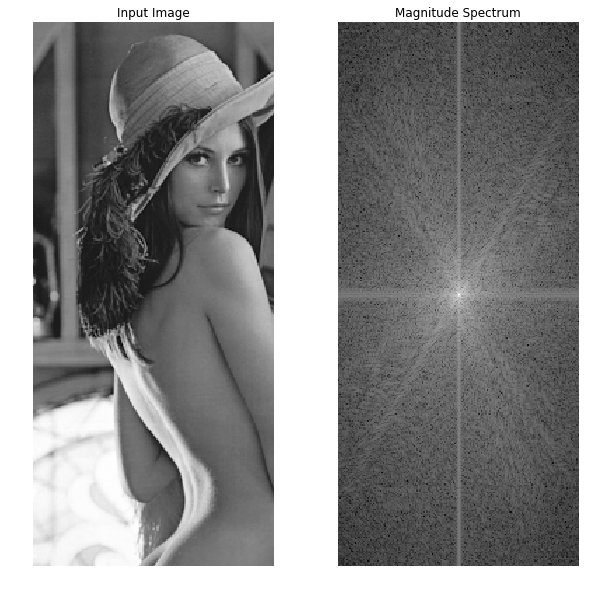

In [133]:
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'); plt.axis('off')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'); plt.axis('off')# plt.xticks([]), plt.yticks([])
plt.show()

In [144]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 60: crow + 60, ccol - 60: ccol + 60] = 1

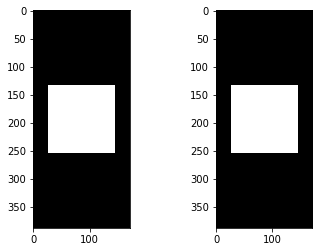

In [145]:
plt.subplot(121)
plt.imshow(mask[:,:,0], cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(mask[:,:,1], cmap=plt.cm.gray)

In [146]:
# apply mask and inverse DFT
fshift = dft_shift * mask

In [147]:
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back_l = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

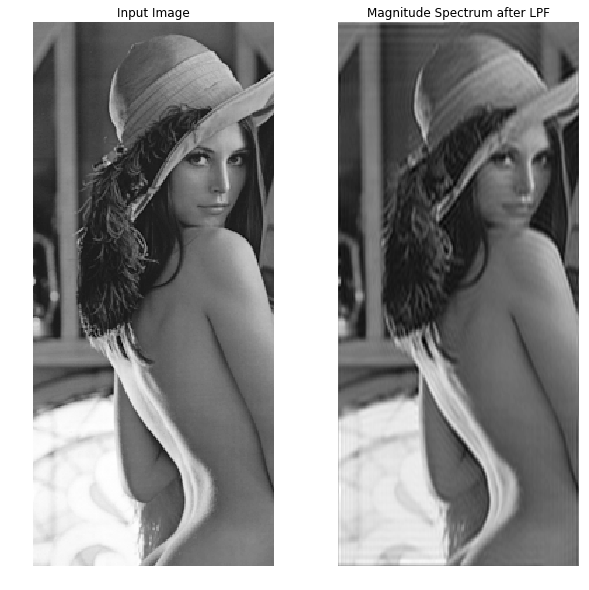

In [148]:
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(122),plt.imshow(img_back_l, cmap = 'gray')
plt.title('Magnitude Spectrum after LPF'), plt.axis('off')
plt.show()

In [154]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

# Filter Array
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
               'sobel_y', 'scharr_x']

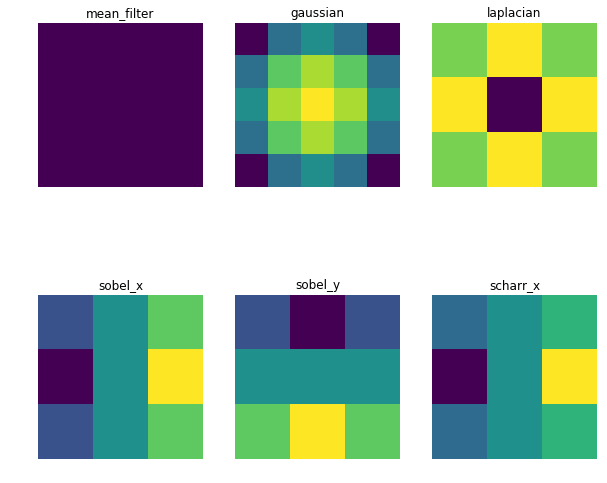

In [177]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10), gridspec_kw = {'wspace':0.2, 'hspace':0})
axes = axes.reshape(-1,)
for ia, ax in enumerate(axes):
    ax.imshow(filters[ia])
    ax.set_title(filter_name[ia])
    ax.set_axis_off()
#plt.tight_layout()
plt.show()

In [180]:
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

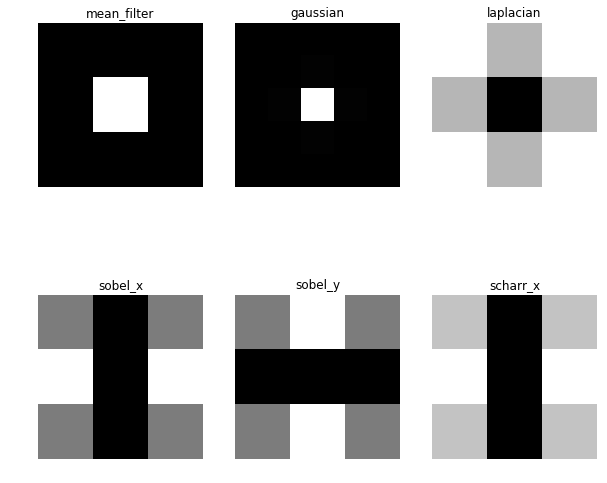

In [185]:
fig, axes = plt.subplots(2,3, figsize=(10,10), gridspec_kw={'wspace':0.2, 'hspace':0})
axes = axes.reshape(-1,)
for ia, ax in enumerate(axes):
    ax.imshow(mag_spectrum[ia], cmap = 'gray')  # , interpolation='bilinear')
    ax.set_title(filter_name[ia])
    ax.set_axis_off()
plt.show()